# Lab 7: Feature Engineering & Anomaly Detection in Financial Data
This lab is meant for practiving with two data science interview problem sets. Most of the questions will focus on data pre-processing testing Pandas & Numpy skills.

## Part 1: Financial Data
The dataset contains commercial customers' financial information and days past due indicatory from 2000 to 2020. The goal is to build a binayr classifier to predict customers 90+ days past due (90+ DPD) probability.

### Importing Libraries | Loading Testing & Training Datasets
Here, we import the necessary libraries required for manipulating data. Here are the following libraries we import:
- **Pandas**: Pandas is a software library written for the Python programming language for data manipulation and analysis.
- **Numpy**: 

Next up, we load the training and testing datasets using pandas, more specifically using `pd.read_csv()` for data manipulation purposes.

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
# loading the testing and training data sets
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

### Winsorizing the Data
Here, we winsorize by limiting the extreme values to the 1st and 99th percentiles. This means adjusting the values in this feature to reduce the impact of extreme outliers. Apply this to both the testing and training datatsets. This involves setting:
- any values below the 1st percentile to the value at the 1st percentile
- any values above the 99th percentile to the value at the 99th percentile

In [3]:
# winsorizing feature_3 of the test dataset
lower_test_limit = test_df['feature_3'].quantile(0.01)
upper_test_limit = test_df['feature_3'].quantile(0.99)
test_df['feature_3_winsor'] = test_df['feature_3'].clip(lower=lower_test_limit, upper=upper_test_limit)
print(test_df['feature_3_winsor'].describe())

count    1032.000000
mean      165.033683
std       244.136623
min        50.827741
25%       111.035135
50%       137.877031
75%       156.320072
max      1984.128898
Name: feature_3_winsor, dtype: float64


In [4]:
# winsorizing feature_3 of the training dataset
lower_train_limit = train_df['feature_3'].quantile(0.01)
upper_train_limit = train_df['feature_3'].quantile(0.99)
train_df['feature_3_winsor'] = train_df['feature_3'].clip(lower=lower_train_limit, upper=upper_train_limit)
print(train_df['feature_3_winsor'].describe())

count    3805.000000
mean      169.643047
std       260.500325
min        54.775195
25%       112.574890
50%       139.067016
75%       155.690392
max      2050.796513
Name: feature_3_winsor, dtype: float64


In [5]:
test_df.head(5)

,feature_1,feature_2,feature_3,feature_4,id,date,y,feature_3_winsor
0,2.595327,-32.891072,136.591557,49.620272,50821,2000-12-31,active,136.591557
1,-5.560043,24.061365,112.975910,-30.343529,50821,2001-12-31,active,112.975910
2,-50.197941,-24.986282,82.180471,-50.341907,50821,2002-12-31,active,82.180471
3,89.590337,132.682123,169.336698,-27.406673,50821,2003-12-31,active,169.336698
4,-22.253535,-72.280530,125.969360,66.272859,50821,2004-12-31,active,125.969360


In [6]:
train_df.head(5)

,feature_1,feature_2,feature_3,feature_4,id,date,y,feature_3_winsor
0,39.165085,60.253765,137.986051,-35.462685,50501,2000-12-31,active,137.986051
1,-12.614289,57.959237,126.212293,44.420647,50501,2001-12-31,90+DPD,126.212293
2,0.043813,-39.293907,138.687175,64.944112,50501,2002-12-31,active,138.687175
3,2.296984,49.996686,123.782456,-3.587873,50501,2003-12-31,active,123.782456
4,7.188897,-83.533230,150.102046,95.359641,50501,2004-12-31,active,150.102046


### Imputing Missing Data with Median Value on Training Set
Be sure to identify any missing values for `feature_3_winsor`. Then, impute the missing values with the median value on the training dataset. Name the new feature "feature_3_impute". Apply this to both the testing and training datasets.

In [7]:
# to find all the missing values in train dataset
missing_values_train = train_df['feature_3_winsor'].isnull().sum()
print("Number of Missing Values: ", missing_values_train)

# replace all the blanks with the median values
median_values_train = train_df['feature_3_winsor'].median()
train_df['feature_3_impute'] = train_df['feature_3_winsor'].fillna(median_values_train)

Number of Missing Values:  136


In [8]:
# to find all the missing values in the test dataset
missing_values_test = test_df['feature_3_winsor'].isnull().sum()
print("Number of Missing Values: ", missing_values_test)

# replace all the blanks with the median values
median_values_test = train_df['feature_3_winsor'].median()
test_df['feature_3_impute'] = train_df['feature_3_winsor'].fillna(median_values_test)

Number of Missing Values:  27


## Imputing Missing Values with Value from Last Year or Next Year
Be sure to identify any missing values for `feature_2`. For each `id`, impute the missing value with the value from the previous year. If the value from the previous year isn't there, then use the value from the next year. Apply this to both the testing and training datasets.

In [9]:
# to find rows with missing values in the train dataset
missing_feature_two_train = train_df['feature_2'].isnull()

# sorting the dataframe by ID  and year to ensure data is in ascending order
train_df = train_df.sort_values(by=['id', 'date'])
train_df['feature_2_impute'] = train_df['feature_2']

# imputing missing values with the value from the previous year and then the next year
train_df['feature_2_impute'] = train_df.groupby('id')['feature_2_impute'].ffill().bfill()

train_df

,feature_1,feature_2,feature_3,feature_4,id,date,y,feature_3_winsor,feature_3_impute,feature_2_impute
0,39.165085,60.253765,137.986051,-35.462685,50501,2000-12-31,active,137.986051,137.986051,60.253765
1,-12.614289,57.959237,126.212293,44.420647,50501,2001-12-31,90+DPD,126.212293,126.212293,57.959237
2,0.043813,-39.293907,138.687175,64.944112,50501,2002-12-31,active,138.687175,138.687175,-39.293907
3,2.296984,49.996686,123.782456,-3.587873,50501,2003-12-31,active,123.782456,123.782456,49.996686
4,7.188897,-83.533230,150.102046,95.359641,50501,2004-12-31,active,150.102046,150.102046,-83.533230
...,...,...,...,...,...,...,...,...,...,...
3936,37.404213,82.740386,135.415762,-41.797518,50820,2012-12-31,active,135.415762,135.415762,82.740386
3937,-41.998683,118.029225,113.602038,65.019912,50820,2013-12-31,90+DPD,113.602038,113.602038,118.029225
3938,23.476915,53.978062,145.438067,35.848482,50820,2014-12-31,active,145.438067,145.438067,53.978062
3939,74.362219,161.320617,163.350476,-14.407989,50820,2015-12-31,active,163.350476,163.350476,161.320617


In [10]:
# to find rows with missing values in the train dataset
missing_feature_two_test = test_df['feature_2'].isnull()

# sorting the dataframe by ID  and year to ensure data is in ascending order
test_df = test_df.sort_values(by=['id', 'date'])
test_df['feature_2_impute'] = test_df['feature_2']

# imputing missing values with the value from the previous year and then the next year
test_df['feature_2_impute'] = test_df.groupby('id')['feature_2_impute'].ffill().bfill()

test_df

,feature_1,feature_2,feature_3,feature_4,id,date,y,feature_3_winsor,feature_3_impute,feature_2_impute
0,2.595327,-32.891072,136.591557,49.620272,50821,2000-12-31,active,136.591557,137.986051,-32.891072
1,-5.560043,24.061365,112.975910,-30.343529,50821,2001-12-31,active,112.975910,126.212293,24.061365
2,-50.197941,-24.986282,82.180471,-50.341907,50821,2002-12-31,active,82.180471,138.687175,-24.986282
3,89.590337,132.682123,169.336698,-27.406673,50821,2003-12-31,active,169.336698,123.782456,132.682123
4,-22.253535,-72.280530,125.969360,66.272859,50821,2004-12-31,active,125.969360,150.102046,-72.280530
...,...,...,...,...,...,...,...,...,...,...
1054,709.178403,178.731833,191.995244,-61.412948,50901,2000-12-31,active,191.995244,149.603063,178.731833
1055,0.541038,22.097372,118.980328,-20.016391,50901,2001-12-31,active,118.980328,79.666896,22.097372
1056,38.258174,8.114327,162.322692,70.443053,50901,2002-12-31,active,162.322692,96.086004,8.114327
1057,17.717661,55.971356,123.899602,-41.830166,50901,2003-12-31,active,123.899602,148.930775,55.971356


### Standardizing Features on Dataset
Next up, we standardize `feature_1`, `feature_2_impute`, `feature_3_impute`, `feature_4` for the training set. Make the appropriate treatments on the testing set. Name the features `feature_1_standard`, `feature_2_standard`, `feature_3_standard` and `feature_4_standard`. Apply this to both the testing and training datasets.

In [11]:
# list of features to standardize
feature_to_standardize = ['feature_1', 'feature_2_impute', 'feature_3_impute', 'feature_4']

# calculating the mean snd standard deviation
mean = {feature: np.mean(train_df[feature]) for feature in feature_to_standardize}
standard_deviation = {feature: np.mean(train_df[feature]) for feature in feature_to_standardize}

# standardizing each future in the dataset
for feature in feature_to_standardize:
    train_df[f'{feature}_standard'] = (train_df[feature] - mean[feature]) / standard_deviation[feature]

train_df

,feature_1,feature_2,feature_3,feature_4,id,date,y,feature_3_winsor,feature_3_impute,feature_2_impute,feature_1_standard,feature_2_impute_standard,feature_3_impute_standard,feature_4_standard
0,39.165085,60.253765,137.986051,-35.462685,50501,2000-12-31,active,137.986051,137.986051,60.253765,0.048083,0.054203,-0.181519,1.900188
1,-12.614289,57.959237,126.212293,44.420647,50501,2001-12-31,90+DPD,126.212293,126.212293,57.959237,-1.337567,0.014058,-0.251356,-4.632782
2,0.043813,-39.293907,138.687175,64.944112,50501,2002-12-31,active,138.687175,138.687175,-39.293907,-0.998828,-1.687488,-0.177360,-6.311220
3,2.296984,49.996686,123.782456,-3.587873,50501,2003-12-31,active,123.782456,123.782456,49.996686,-0.938531,-0.125255,-0.265769,-0.706579
4,7.188897,-83.533230,150.102046,95.359641,50501,2004-12-31,active,150.102046,150.102046,-83.533230,-0.807620,-2.461502,-0.109651,-8.798644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936,37.404213,82.740386,135.415762,-41.797518,50820,2012-12-31,active,135.415762,135.415762,82.740386,0.000961,0.447631,-0.196765,2.418259
3937,-41.998683,118.029225,113.602038,65.019912,50820,2013-12-31,90+DPD,113.602038,113.602038,118.029225,-2.123912,1.065046,-0.326155,-6.317419
3938,23.476915,53.978062,145.438067,35.848482,50820,2014-12-31,active,145.438067,145.438067,53.978062,-0.371742,-0.055597,-0.137316,-3.931739
3939,74.362219,161.320617,163.350476,-14.407989,50820,2015-12-31,active,163.350476,163.350476,161.320617,0.989981,1.822475,-0.031066,0.178305


In [12]:
# list of features to standardize
feature_to_standardize = ['feature_1', 'feature_2_impute', 'feature_3_impute', 'feature_4']

# calculating the mean snd standard deviation
mean = {feature: np.mean(test_df[feature]) for feature in feature_to_standardize}
standard_deviation = {feature: np.mean(test_df[feature]) for feature in feature_to_standardize}

# standardizing each future in the dataset
for feature in feature_to_standardize:
    test_df[f'{feature}_standard'] = (train_df[feature] - mean[feature]) / standard_deviation[feature]

test_df

,feature_1,feature_2,feature_3,feature_4,id,date,y,feature_3_winsor,feature_3_impute,feature_2_impute,feature_1_standard,feature_2_impute_standard,feature_3_impute_standard,feature_4_standard
0,2.595327,-32.891072,136.591557,49.620272,50821,2000-12-31,active,136.591557,137.986051,-32.891072,0.510661,0.126779,-0.095278,1.987926
1,-5.560043,24.061365,112.975910,-30.343529,50821,2001-12-31,active,112.975910,126.212293,24.061365,-1.486554,0.083870,-0.172474,-4.742684
2,-50.197941,-24.986282,82.180471,-50.341907,50821,2002-12-31,active,82.180471,138.687175,-24.986282,-0.998310,-1.734818,-0.090681,-6.471899
3,89.590337,132.682123,169.336698,-27.406673,50821,2003-12-31,active,169.336698,123.782456,132.682123,-0.911402,-0.065034,-0.188405,-0.697702
4,-22.253535,-72.280530,125.969360,66.272859,50821,2004-12-31,active,125.969360,150.102046,-72.280530,-0.722712,-2.562118,-0.015838,-9.034574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,709.178403,178.731833,191.995244,-61.412948,50901,2000-12-31,active,191.995244,149.603063,178.731833,-0.393633,-1.911654,-0.019109,-7.076371
1055,0.541038,22.097372,118.980328,-20.016391,50901,2001-12-31,active,118.980328,79.666896,22.097372,-1.755073,-0.894597,-0.477654,10.613848
1056,38.258174,8.114327,162.322692,70.443053,50901,2002-12-31,active,162.322692,96.086004,8.114327,-2.545792,-0.262653,-0.370000,0.315908
1057,17.717661,55.971356,123.899602,-41.830166,50901,2003-12-31,active,123.899602,148.930775,55.971356,0.968972,0.797425,-0.023517,0.528445


## Part 2
Answer the following questions given below. These questions cover in detail about the structure of the dataset, summary statistics, as well as forms of data wrangling.

### Question 1: Load
- [x] Load the data, which is in line-delimited JSON format
- [x] Describe the structure of the data. Number of records and fields in each record?
- [x] Provide additional basic summary statistics for each field. Include a count of null, maximum, minimum and unique values where appropriate.

In [13]:
with open('transactions.txt', 'r') as file:
    data = [json.loads(line) for line in file]

text_df = pd.DataFrame(data)
text_df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.00,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.00,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.00,,,,True,,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,,1095.04,,,,False,,,False,False
786359,732852505,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,,1214.96,,,,False,,,False,False
786360,732852505,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,,1233.85,,,,False,,,False,False
786361,732852505,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,,1283.28,,,,False,,,False,False


In [14]:
statistics_df = pd.DataFrame({
    'count' : text_df.count(),
    'null_count' : text_df.isnull().sum(),
    'unique_count' : text_df.nunique(),
    'max' : text_df.max(numeric_only=True),
    'min' : text_df.min(numeric_only=True)
})

statistics_df

,count,null_count,unique_count,max,min
accountNumber,786363,0,5000,NaN,NaN
accountOpenDate,786363,0,1820,NaN,NaN
acqCountry,786363,0,5,NaN,NaN
availableMoney,786363,0,521916,50000.0,-1005.63
cardCVV,786363,0,899,NaN,NaN
cardLast4Digits,786363,0,5246,NaN,NaN
cardPresent,786363,0,2,True,False
creditLimit,786363,0,10,50000.0,250.0
currentBalance,786363,0,487318,47498.81,0.0
currentExpDate,786363,0,165,NaN,NaN


### Question 2: Histogram Plotting
- [x] Plot a histogram of the processed amounts of each transactions, the `transaction` column
- [x] Report any structure you find and hypotheses that you have aboue that structure

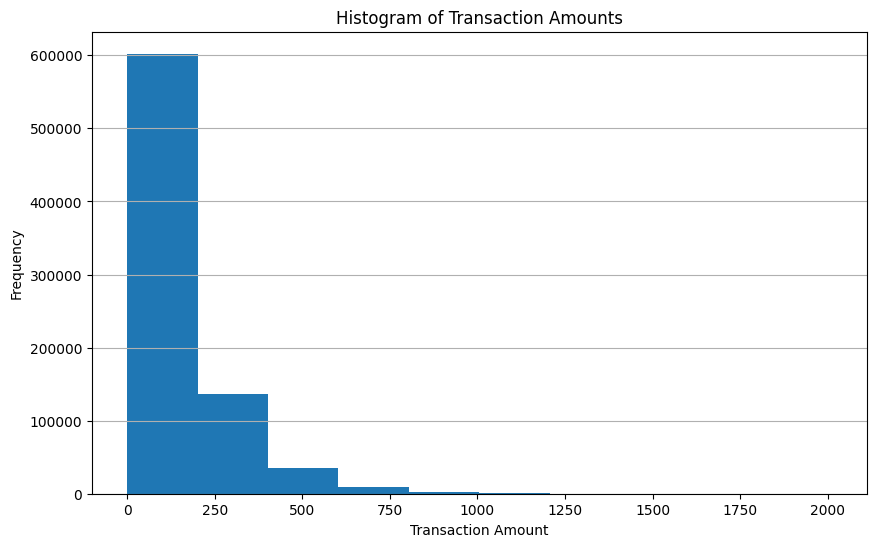

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(text_df['transactionAmount'])  
plt.title('Histogram of Transaction Amounts')  
plt.xlabel('Transaction Amount') 
plt.ylabel('Frequency') 
plt.grid(axis='y')  
plt.show()

As per the histogram above, it can be seen that transactions between 0 to 250 dollars are the most common, followed by 250 to 500, 500 to 750, 750 to 1000 and 1000 to 1250 dollars.

### Question 3: Data Wrangling on Duplicate Transactions
- [x] Can you programmatically identify reversed and multi-swipe transactions?
- [x] What total number of transactions and total dollar amount do you estimate for the reversed transactions?
- [x] Did you find anything interesting about either kind of transaction?

In [16]:
# finding the types of transactions being made
transaction_types = text_df['transactionType'].unique()
print(transaction_types)

['PURCHASE' 'ADDRESS_VERIFICATION' 'REVERSAL' '']


In [17]:
# finding the number of transaction types being made
transaction_summary = text_df.groupby('transactionType').agg({
    'transactionAmount': ['count'],
    'merchantName': 'nunique'
}).reset_index()

print(transaction_summary)

        transactionType transactionAmount merchantName
                                    count      nunique
0                                     698          286
1  ADDRESS_VERIFICATION             20169         1895
2              PURCHASE            745193         2490
3              REVERSAL             20303         1922


In [18]:
# finding the sum of each transaction being made
transaction_summary = text_df.groupby('transactionType').agg({
    'transactionAmount': ['sum'],
    'merchantName': 'nunique'
}).reset_index()

print(transaction_summary)

        transactionType transactionAmount merchantName
                                      sum      nunique
0                            1.084598e+05          286
1  ADDRESS_VERIFICATION      0.000000e+00         1895
2              PURCHASE      1.047903e+08         2490
3              REVERSAL      2.821792e+06         1922


With regards to the transactions that were made, it can be seen that the sum of the reversal purchases were higher than the sum of the purchases. As the sum of the reversals are much higher, it can be suggested that a lot of fraudulent purchases were made.